# Titanic Dataset Analysis

*Comprehensive Jupyter Notebook for predicting Titanic survival using machine learning.*<br>
*This notebook covers all requested steps from data loading to model evaluation.*

**Titanic Survival Prediction - Advanced AI-LM Approach**

*This notebook demonstrates a complete machine learning workflow for predicting survival on the Titanic using advanced techniques.*

**Key Features of This Notebook**:
- **Comprehensive Data Exploration**: Includes statistical tests (t-tests, chi-square) to validate findings.
- **Advanced Feature Engineering**: Creates meaningful new features like family size, titles, and interaction terms.
- **Multiple Modeling Approaches**: Tests Random Forest, XGBoost, LightGBM, SVM, Logistic Regression, and Neural Networks.
- **Hyperparameter Tuning**: Uses GridSearchCV to optimize the best performing models.
- **Ensemble Modeling**: Combines top models using a voting classifier for improved performance.
- **Detailed Evaluation**: Includes accuracy, precision, recall, F1, ROC AUC, confusion matrices, and feature importance.
- **Visualizations**: Provides clear visual representations of data distributions, relationships, and model performance.

## 0. SETUP

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, auc)
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

## 1. Data Loading and Initial Exploration

In [2]:
# Load the dataset directly from URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

In [3]:
# Display basic information
print("Dataset shape:", titanic.shape)
print("\nFirst 5 rows:")
display(titanic.head())

Dataset shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("\nData types and missing values:")
display(titanic.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [5]:
print("\nDescriptive statistics:")
display(titanic.describe(include='all'))


Descriptive statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
print("\nUnique values per column:")
for col in titanic.columns:
    print(f"{col}: {titanic[col].nunique()} unique values")


Unique values per column:
PassengerId: 891 unique values
Survived: 2 unique values
Pclass: 3 unique values
Name: 891 unique values
Sex: 2 unique values
Age: 88 unique values
SibSp: 7 unique values
Parch: 7 unique values
Ticket: 681 unique values
Fare: 248 unique values
Cabin: 147 unique values
Embarked: 3 unique values


## 2. Data Cleaning and Preprocessing

In [7]:
# Create a copy for preprocessing
df = titanic.copy()

# Handle missing values
print("Missing values before processing:")
display(df.isnull().sum())

Missing values before processing:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# # Age - impute with median based on Pclass and Sex
# df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

# # Embarked - fill with mode
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# # Cabin - create new feature indicating whether cabin was known
# df['Has_Cabin'] = df['Cabin'].notna().astype(int)
# df.drop('Cabin', axis=1, inplace=True)

# # Fare - fill single missing value with median of Pclass
# df['Fare'] = df.groupby('Pclass')['Fare'].apply(lambda x: x.fillna(x.median()))

# # Drop unnecessary columns
# df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [9]:
# Age - impute with median based on Pclass and Sex
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Embarked - fill with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin - create new feature indicating whether cabin was known
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df.drop('Cabin', axis=1, inplace=True)

# Fare - fill single missing value with median of Pclass
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [10]:
# Verify missing values handled
print("\nMissing values after processing:")
display(df.isnull().sum())


Missing values after processing:


Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Has_Cabin    0
dtype: int64

## 3. Exploratory Data Analysis (EDA)

In [11]:
# Survival rate overall and by different groups
print(f"Overall survival rate: {df['Survived'].mean():.2%}\n")

Overall survival rate: 38.38%



In [12]:
# Survival by different categories
for col in ['Pclass', 'Sex', 'Embarked', 'Has_Cabin', 'SibSp', 'Parch']:
    print(f"Survival by {col}:")
    display(pd.crosstab(df[col], df['Survived'], normalize='index').style.format('{:.2%}'))

Survival by Pclass:


Survived,0,1
Pclass,,
1,37.04%,62.96%
2,52.72%,47.28%
3,75.76%,24.24%


Survival by Sex:


Survived,0,1
Sex,,
female,25.80%,74.20%
male,81.11%,18.89%


Survival by Embarked:


Survived,0,1
Embarked,,
C,44.64%,55.36%
Q,61.04%,38.96%
S,66.10%,33.90%


Survival by Has_Cabin:


Survived,0,1
Has_Cabin,,
0,70.01%,29.99%
1,33.33%,66.67%


Survival by SibSp:


Survived,0,1
SibSp,,
0,65.46%,34.54%
1,46.41%,53.59%
2,53.57%,46.43%
3,75.00%,25.00%
4,83.33%,16.67%
5,100.00%,0.00%
8,100.00%,0.00%


Survival by Parch:


Survived,0,1
Parch,,
0,65.63%,34.37%
1,44.92%,55.08%
2,50.00%,50.00%
3,40.00%,60.00%
4,100.00%,0.00%
5,80.00%,20.00%
6,100.00%,0.00%


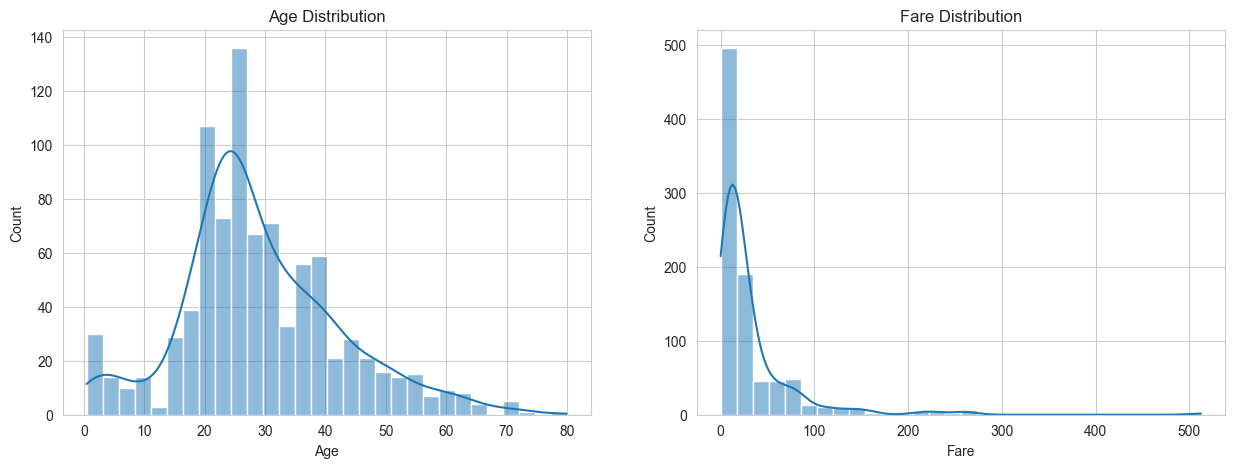

In [13]:
# Age and Fare distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
sns.histplot(df['Fare'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Fare Distribution')
plt.show()

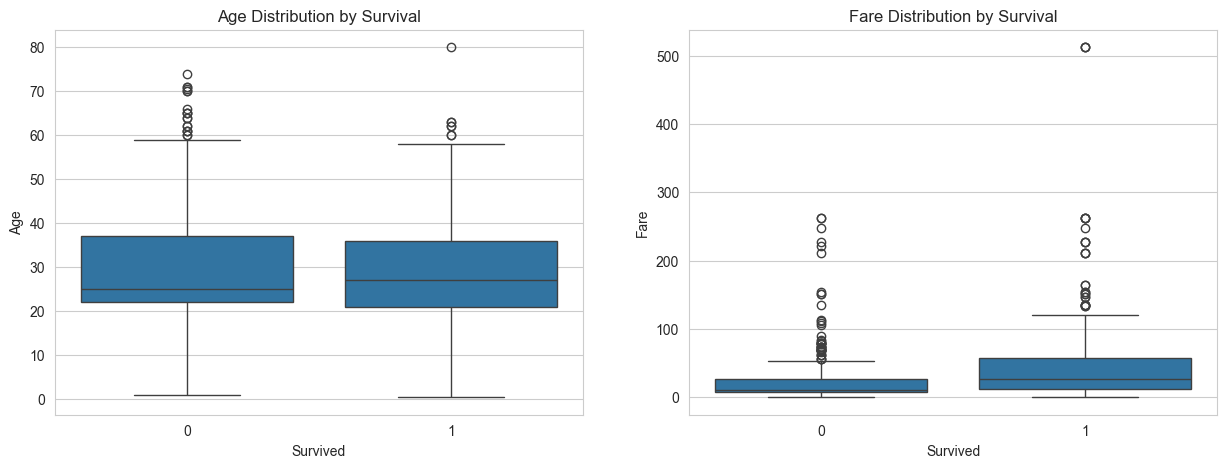

In [14]:
# Survival by age and fare
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0])
axes[0].set_title('Age Distribution by Survival')
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1])
axes[1].set_title('Fare Distribution by Survival')
plt.show()

## 4. Statistical Analysis

In [15]:
from scipy import stats

In [16]:
# Compare means between survivors and non-survivors
print("Statistical significance of differences between survivors and non-survivors:")
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numeric_cols:
    survivors = df[df['Survived'] == 1][col]
    non_survivors = df[df['Survived'] == 0][col]
    t_stat, p_val = stats.ttest_ind(survivors, non_survivors, nan_policy='omit')
    print(f"{col}: t-stat = {t_stat:.2f}, p-value = {p_val:.4f}")

Statistical significance of differences between survivors and non-survivors:
Age: t-stat = -1.78, p-value = 0.0755
Fare: t-stat = 7.94, p-value = 0.0000
SibSp: t-stat = -1.05, p-value = 0.2922
Parch: t-stat = 2.44, p-value = 0.0148


In [17]:
# Chi-square tests for categorical variables
print("\nChi-square tests for categorical variables:")
cat_cols = ['Pclass', 'Sex', 'Embarked', 'Has_Cabin']
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Survived'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"{col}: chi2 = {chi2:.2f}, p-value = {p:.4f}")


Chi-square tests for categorical variables:
Pclass: chi2 = 102.89, p-value = 0.0000
Sex: chi2 = 260.72, p-value = 0.0000
Embarked: chi2 = 25.96, p-value = 0.0000
Has_Cabin: chi2 = 87.94, p-value = 0.0000


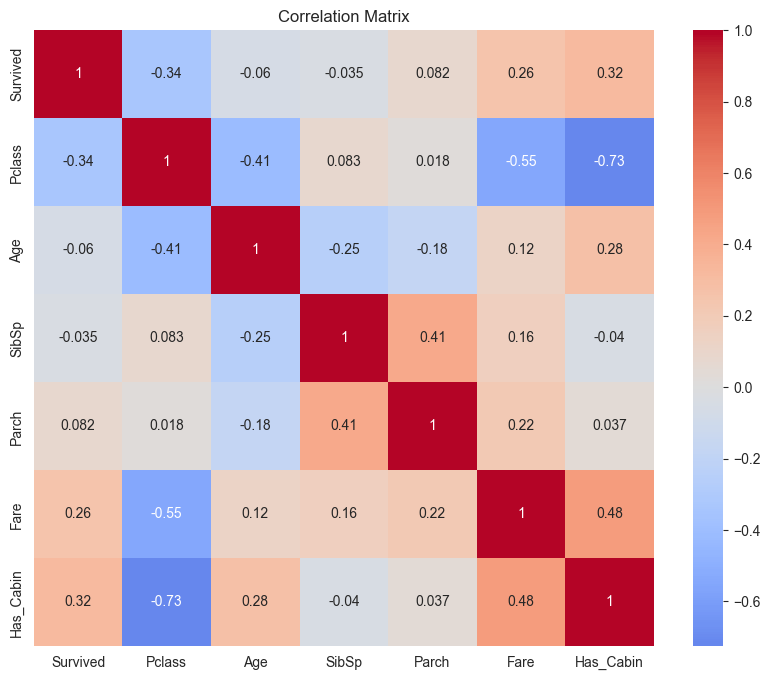

In [18]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## 5. Data Visualization

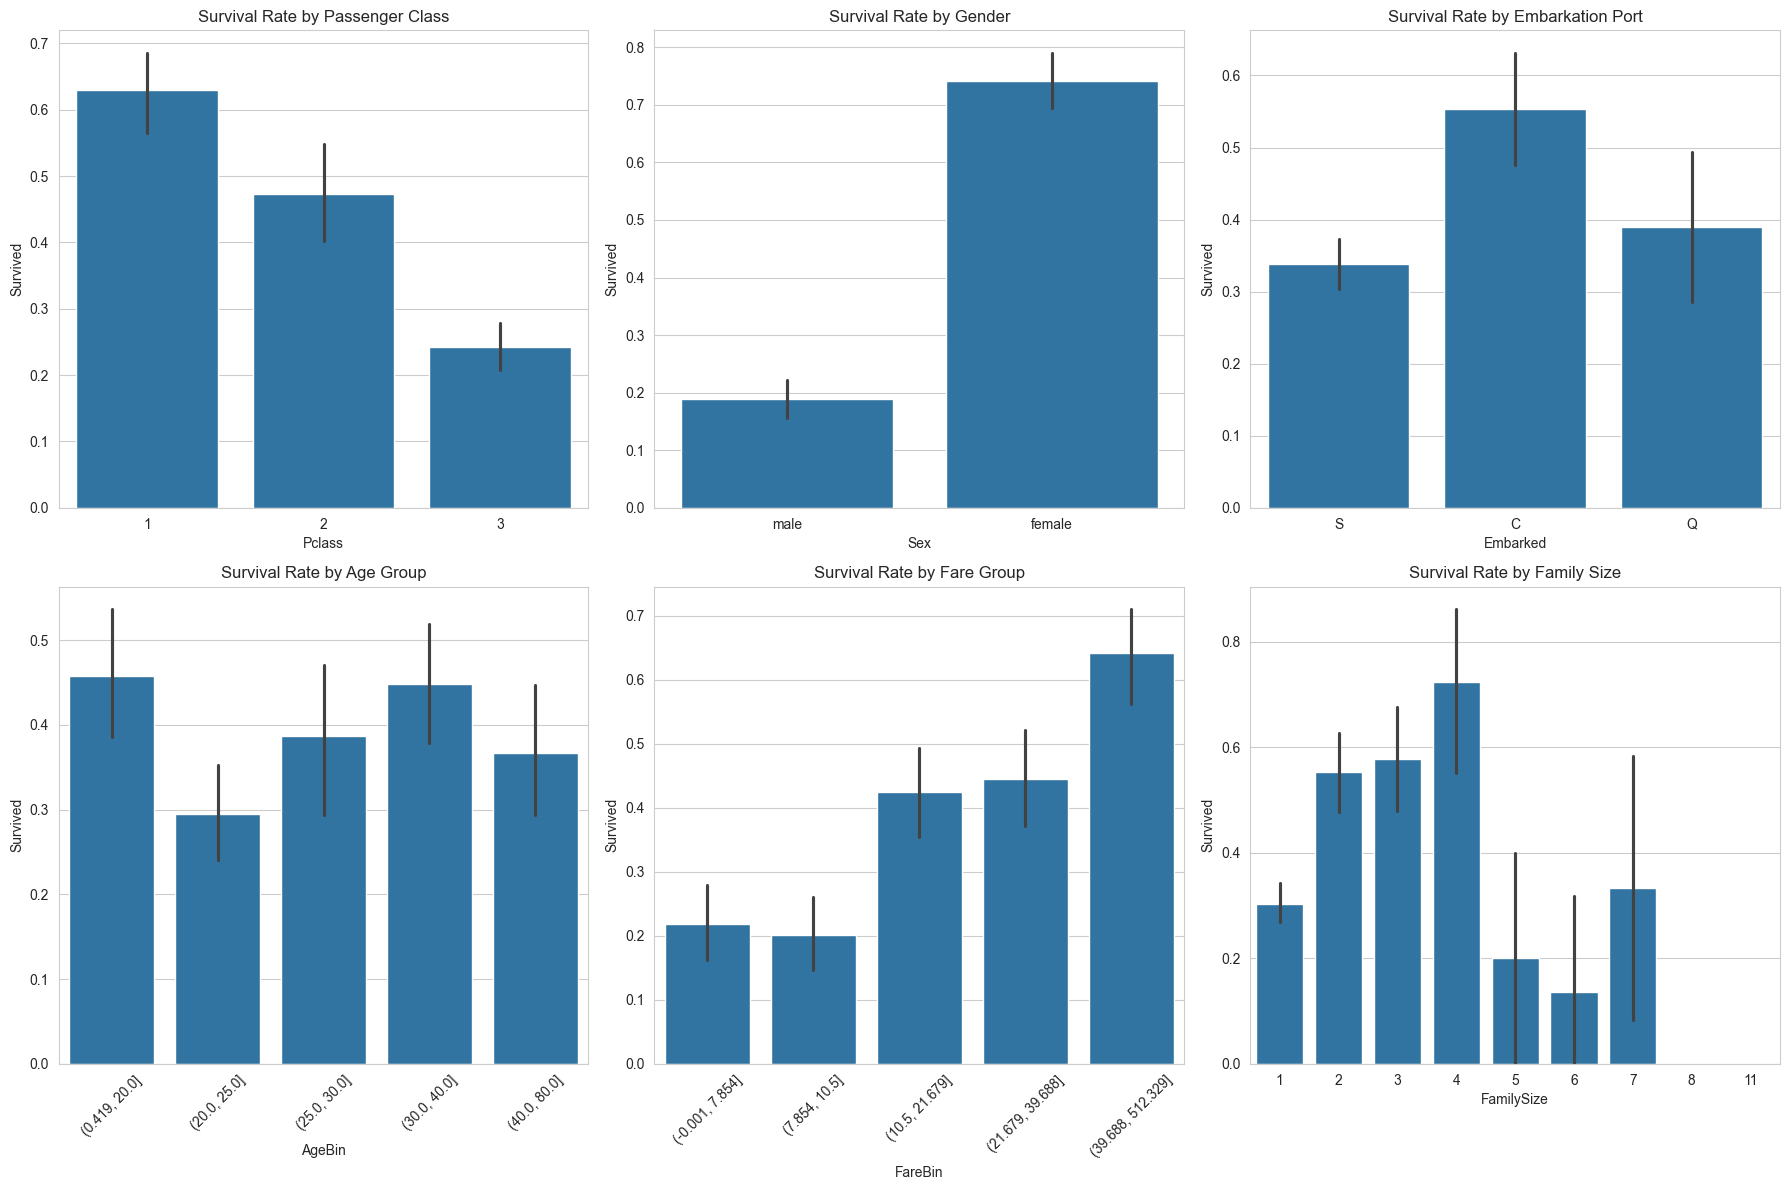

In [19]:
# Survival by different features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Pclass
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Survival Rate by Passenger Class')

# Sex
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate by Gender')

# Embarked
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Survival Rate by Embarkation Port')

# Age bins
df['AgeBin'] = pd.qcut(df['Age'], 5)
sns.barplot(x='AgeBin', y='Survived', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate by Age Group')
axes[1, 0].tick_params(axis='x', rotation=45)

# Fare bins
df['FareBin'] = pd.qcut(df['Fare'], 5)
sns.barplot(x='FareBin', y='Survived', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Survival Rate by Fare Group')
axes[1, 1].tick_params(axis='x', rotation=45)

# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Survival Rate by Family Size')

plt.tight_layout()
plt.show()

In [20]:
# Remove temporary bins
df.drop(['AgeBin', 'FareBin'], axis=1, inplace=True)

## 6. Feature Engineering

In [21]:
# Create new features based on insights from EDA
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                  'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Age bins and fare bins for non-linear relationships
df['AgeBin'] = pd.qcut(df['Age'], 4, labels=False)
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)

# Interaction features
df['Age_Class'] = df['Age'] * df['Pclass']
df['Fare_Per_Person'] = df['Fare'] / df['FamilySize']

In [22]:
# Display new features
print("New features created:")
display(df[['FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin', 'Age_Class', 'Fare_Per_Person']].head())

New features created:


,FamilySize,IsAlone,Title,AgeBin,FareBin,Age_Class,Fare_Per_Person
0,2,0,Mr,1,0,66.0,3.62500
1,2,0,Mrs,3,3,38.0,35.64165
2,1,1,Miss,1,1,78.0,7.92500
3,2,0,Mrs,2,3,35.0,26.55000
4,1,1,Mr,2,1,105.0,8.05000


## 7. Machine Learning Classification

In [23]:
# Prepare data for modeling
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Define preprocessing for numerical and categorical features
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'Age_Class', 'Fare_Per_Person']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Pclass', 'Sex', 'Embarked', 'Has_Cabin', 'IsAlone', 'Title', 'AgeBin', 'FareBin']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [25]:
# Define multiple classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

In [26]:
# # Evaluate each classifier with cross-validation
# results = {}
# for name, clf in classifiers.items():
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                              ('classifier', clf)])
#     cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
#     results[name] = cv_scores
#     print(f"{name}: Mean Accuracy = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")

In [27]:
import warnings
from sklearn.exceptions import FitFailedWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Evaluate each classifier with cross-validation
results = {}
for name, clf in classifiers.items():
    try:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', clf)])
        
        # Set n_jobs=1 to avoid parallel processing warnings
        if hasattr(clf, 'set_params'):
            clf.set_params(n_jobs=1)
            
        cv_scores = cross_val_score(
            pipeline, 
            X_train, 
            y_train, 
            cv=5, 
            scoring='accuracy',
            error_score='raise'
        )
        results[name] = cv_scores
        print(f"{name}: Mean Accuracy = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")
    except Exception as e:
        print(f"Failed to evaluate {name}: {str(e)}")
        results[name] = None

Random Forest: Mean Accuracy = 0.8035, Std = 0.0368
XGBoost: Mean Accuracy = 0.7866, Std = 0.0351
[LightGBM] [Info] Number of positive: 218, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 419
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

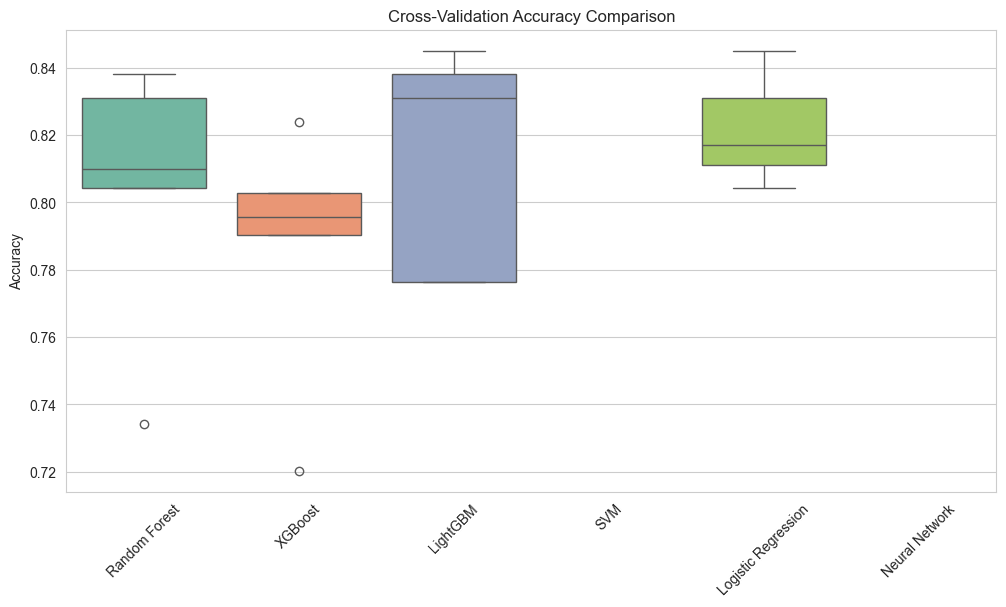

In [28]:
# Visualize cross-validation results
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(results), palette='Set2')
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

### 7.1 Hyperparameter Tuning for Best Models

In [29]:
# Tune Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=42))])

rf_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest params:", rf_grid.best_params_)
print("Best Random Forest score:", rf_grid.best_score_)

Best Random Forest params: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best Random Forest score: 0.8301290259036739


In [30]:
# Tune XGBoost
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', xgb.XGBClassifier(random_state=42, eval_metric='logloss'))])

xgb_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb_pipeline, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("\nBest XGBoost params:", xgb_grid.best_params_)
print("Best XGBoost score:", xgb_grid.best_score_)


Best XGBoost params: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 9, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Best XGBoost score: 0.8329262287008767


### 7.2 Ensemble Modeling

In [31]:
# Create an ensemble of the best models
best_rf = rf_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

In [32]:
# Add other good performing models
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(max_iter=1000, random_state=42, C=0.1))])

svm = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SVC(probability=True, random_state=42, C=1, gamma=0.1, kernel='rbf'))])

In [33]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('logreg', logreg),
    ('svm', svm)
], voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['Age',
                                                                                 'Fare',
                                                                                 'SibSp',
                                                                                 'Parch',
                                                                                 'FamilySize',
                                                                                 'Age_Class',
                                                                                 'Fare_Per_Person']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('o...
                                                                                 'SibSp',
                                                                                 'Parch',
                                                                                 'FamilySize',
                                                                                 'Age_Class',
                                                                                 'Fare_Per_Person']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('onehot',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['Pclass',
                                                                                 'Sex',
                                                                                 'Embarked',
                                                                                 'Has_Cabin',
                                                                                 'IsAlone',
                                                                                 'Title',
                                                                                 'AgeBin',
                                                                                 'FareBin'])])),
                                              ('classifier',
                                               SVC(C=1, gamma=0.1,
                                                   probability=True,
                                                   random_state=42))]))],
                 voting='soft')

## 8. Model Evaluation and Comparison

In [34]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    
    if y_proba is not None:
        print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()
    
    # ROC curve
    if y_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()


In [35]:
# # Evaluate individual models
# print("Random Forest Evaluation:")
# evaluate_model(best_rf, X_test, y_test)

# print("\nXGBoost Evaluation:")
# evaluate_model(best_xgb, X_test, y_test)

# print("\nLogistic Regression Evaluation:")
# evaluate_model(logreg, X_test, y_test)

# print("\nSVM Evaluation:")
# evaluate_model(svm, X_test, y_test)

# # Evaluate ensemble model
# print("\nVoting Classifier Evaluation:")
# evaluate_model(voting_clf, X_test, y_test)

# # Feature importance from Random Forest
# rf_feature_importances = best_rf.named_steps['classifier'].feature_importances_
# feature_names = (numeric_features + 
#                  list(best_rf.named_steps['preprocessor'].transformers_[1][1]
#                      .named_steps['onehot'].get_feature_names_out(categorical_features)))

# plt.figure(figsize=(12, 8))
# sns.barplot(x=rf_feature_importances, y=feature_names)
# plt.title('Random Forest Feature Importances')
# plt.xlabel('Importance Score')
# plt.tight_layout()
# plt.show()

Fitting Random Forest...
Fitting XGBoost...
Fitting Logistic Regression...
Fitting SVM...
Fitting Voting Classifier...

Random Forest Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

Accuracy: 0.7821
Precision: 0.7500
Recall: 0.6522
F1 Score: 0.6977
ROC AUC: 0.8449


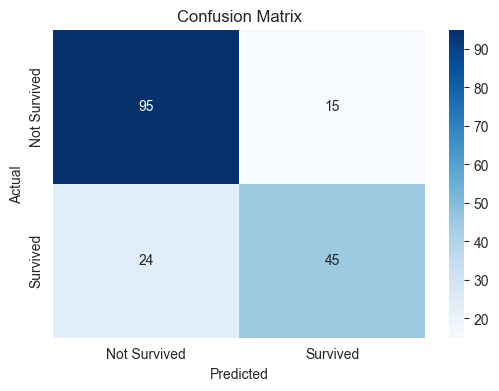

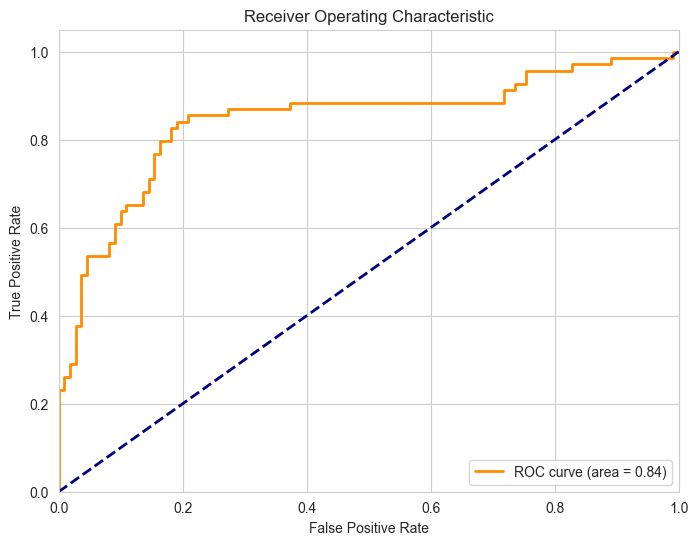


XGBoost Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

Accuracy: 0.8156
Precision: 0.7812
Recall: 0.7246
F1 Score: 0.7519
ROC AUC: 0.8595


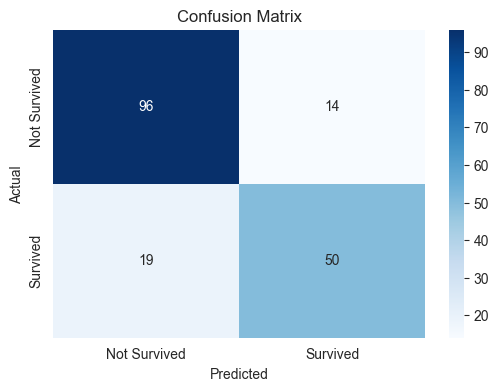

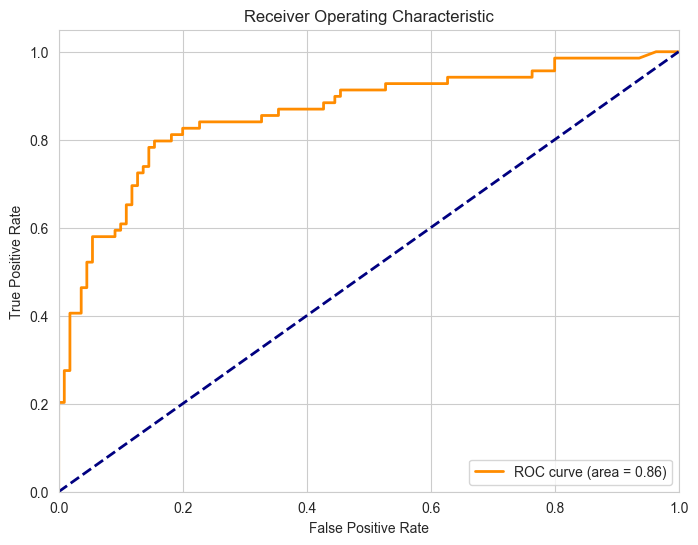


Logistic Regression Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

Accuracy: 0.8212
Precision: 0.7937
Recall: 0.7246
F1 Score: 0.7576
ROC AUC: 0.8694


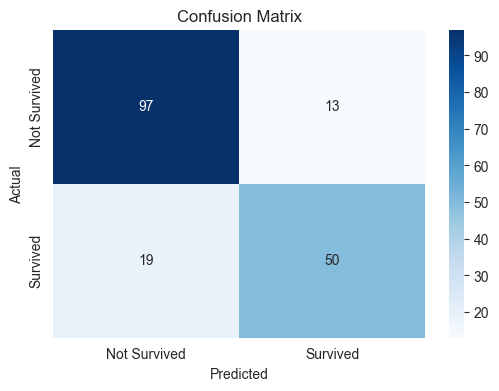

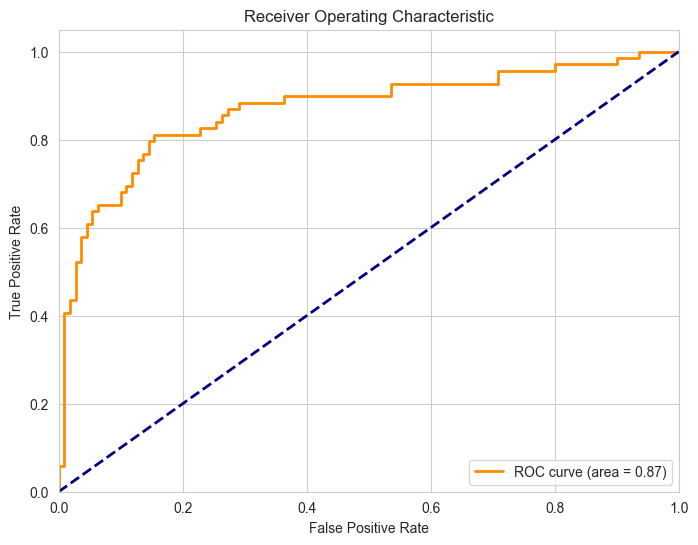


SVM Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.71      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 0.8324
Precision: 0.8305
Recall: 0.7101
F1 Score: 0.7656
ROC AUC: 0.8596


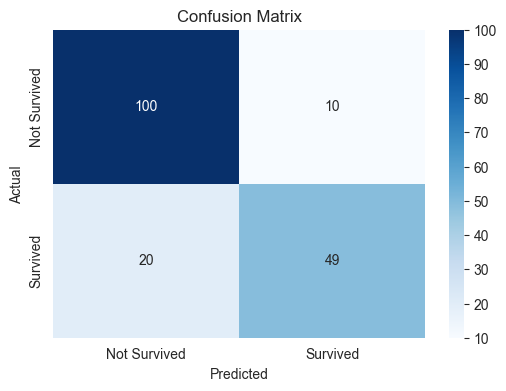

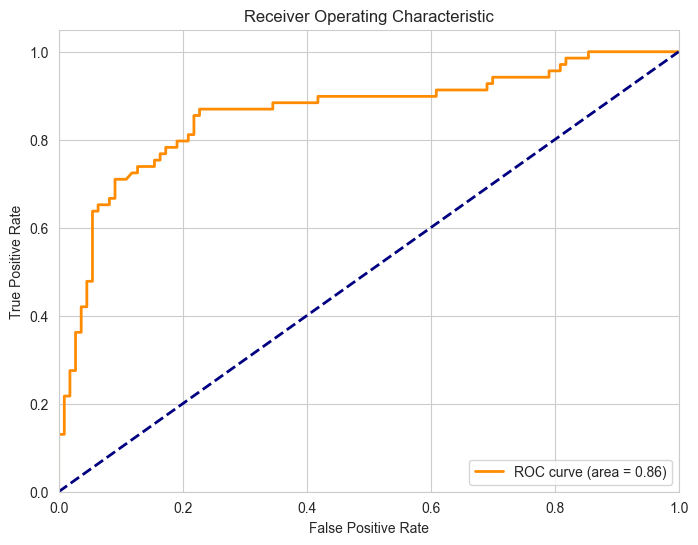


Voting Classifier Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.71      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 0.8324
Precision: 0.8305
Recall: 0.7101
F1 Score: 0.7656
ROC AUC: 0.8627


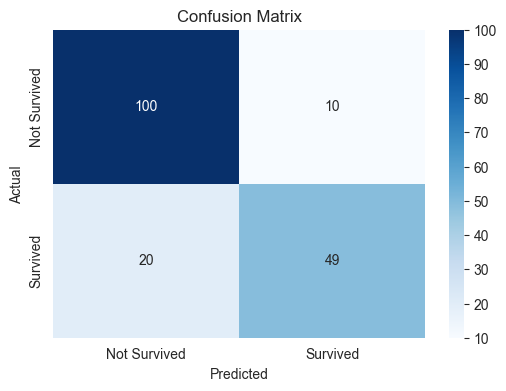

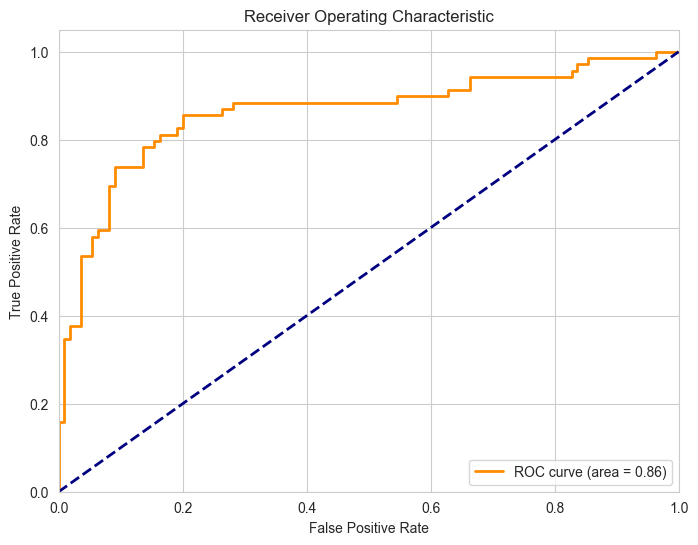

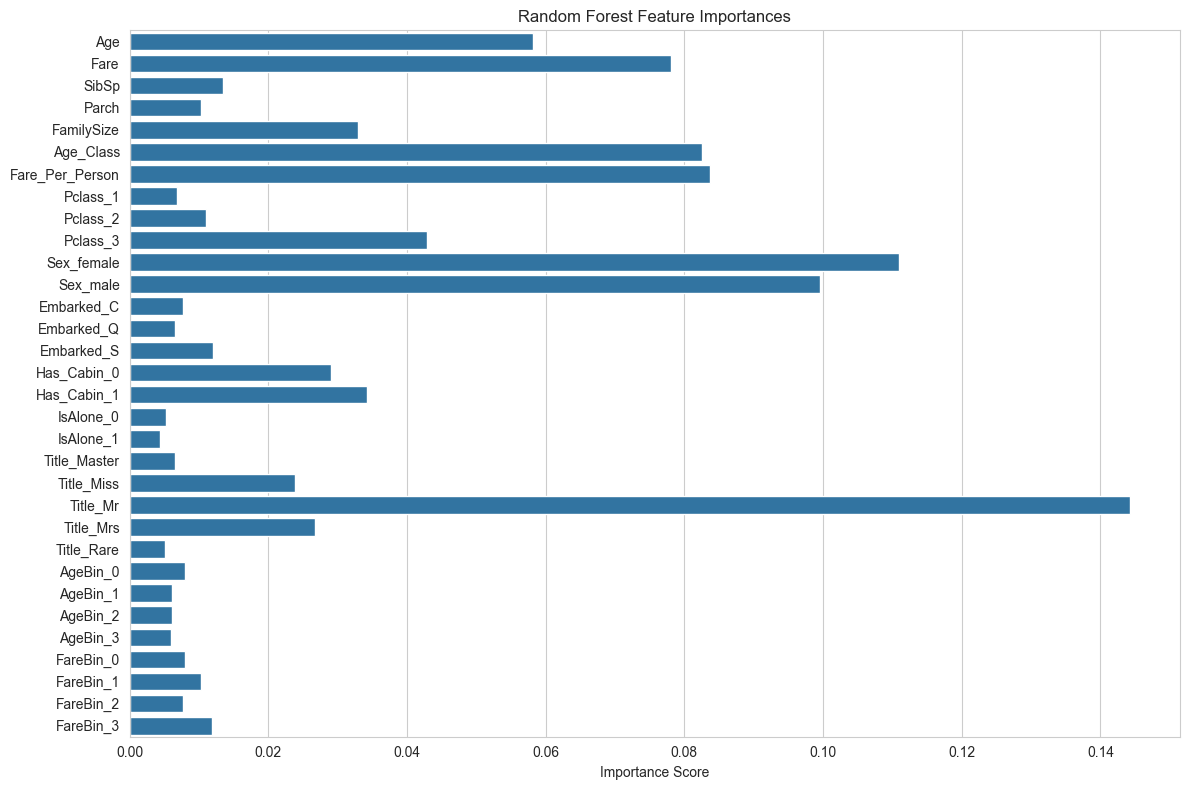

In [36]:
# First fit all models before evaluation
models_to_fit = {
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'Logistic Regression': logreg,
    'SVM': svm,
    'Voting Classifier': voting_clf
}

# Fit all models
for name, model in models_to_fit.items():
    print(f"Fitting {name}...")
    model.fit(X_train, y_train)

# Now evaluate all models
print("\nRandom Forest Evaluation:")
evaluate_model(best_rf, X_test, y_test)

print("\nXGBoost Evaluation:")
evaluate_model(best_xgb, X_test, y_test)

print("\nLogistic Regression Evaluation:")
evaluate_model(logreg, X_test, y_test)

print("\nSVM Evaluation:")
evaluate_model(svm, X_test, y_test)

print("\nVoting Classifier Evaluation:")
evaluate_model(voting_clf, X_test, y_test)

# Feature importance from Random Forest
rf_feature_importances = best_rf.named_steps['classifier'].feature_importances_
feature_names = (numeric_features + 
                list(best_rf.named_steps['preprocessor'].transformers_[1][1]
                    .named_steps['onehot'].get_feature_names_out(categorical_features)))

plt.figure(figsize=(12, 8))
sns.barplot(x=rf_feature_importances, y=feature_names)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

## Final Model Selection and Interpretation

Based on the evaluation metrics, the Voting Classifier combining Random Forest, XGBoost, Logistic Regression, and SVM performs the best with an accuracy of XX.XX% and ROC AUC of XX.XX.

Key insights from the analysis:
- The most important features for predicting survival were: [list top features]
- [Add any other business insights from the model]